In [50]:
from PIL import Image

def clear_bits(img, bits_to_clear) -> Image.Image:
    # 获取图像的尺寸和像素数据
    img = img.copy()
    width, height = img.size
    pixels = img.load()

    # 计算用于清除位的掩码
    mask = 0xFF ^ ((1 << bits_to_clear))
    
    # 处理每个像素
    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i, j]
            # 清除指定的位
            r &= mask
            g &= mask
            b &= mask
            # 将修改后的像素写回图像
            pixels[i, j] = (r, g, b)

    return img

def get_bit_image(image, bit_to_extract) -> Image.Image:
    # 获取图像的尺寸和像素数据
    image = image.copy()
    width, height = image.size
    pixels = image.load()

    # 创建一个新的图像，用于存储提取的位
    bit_image = Image.new("RGB", (width, height))
    bit_pixels = bit_image.load()

    # 创建一个掩码，用于提取指定的位
    mask = 1 << bit_to_extract

    # 处理每个像素
    for i in range(width):
        for j in range(height):
            r, g, b = pixels[i, j]
            # 提取指定的位
            r = 255 if r & mask else 0
            g = 255 if g & mask else 0
            b = 255 if b & mask else 0
            # 将提取的位写入新图像
            bit_pixels[i, j] = (r, g, b)

    return bit_image

In [118]:
# Display functions
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def load_image(image_path):
    """加载图像"""
    image = Image.open(image_path)
    image = image.convert("RGB") # 确保图像是RGB格式
    return image

def extract_bits(pixels):
    """从每个像素中提取8个bit，并生成8个新的图像"""
    bit_images = [np.zeros(pixels.shape, dtype=np.uint8) for _ in range(8)]
    for i in range(8):
        bit_images[i] = (pixels >> i) & 1
        bit_images[i] *= 255  # 将0/1值转换为0/255以便显示
    return bit_images

def show_bit_images(images, title=''):
    """使用matplotlib显示图像列表"""
    fig, ax = plt.subplots(1, len(images), figsize=(20, 5))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
        ax[i].set_title(f'Bit {i}')
    fig.suptitle(title, fontsize=16, y=0.8)
    plt.savefig(f'{title}.png')
    plt.show()

def show_images(images, subtitle=[], title='', size=(10, 5)):
    """使用matplotlib显示图像列表"""
    fig, ax = plt.subplots(1, len(images), figsize=size)
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
        ax[i].set_title(subtitle[i] if subtitle else f'Image {i}')
    if title != '':
        fig.suptitle(title, fontsize=16)
    plt.show()

def show_image_all_bits(image):
    """显示图像的所有bit层"""
    pixels = np.array(image)
    bit_images = extract_bits(pixels)
    bit_images.append(image)
    image_titles = [f'Bit {i}' for i in range(8)] + ['Combined']
    show_images(bit_images, image_titles, size=(20, 5))

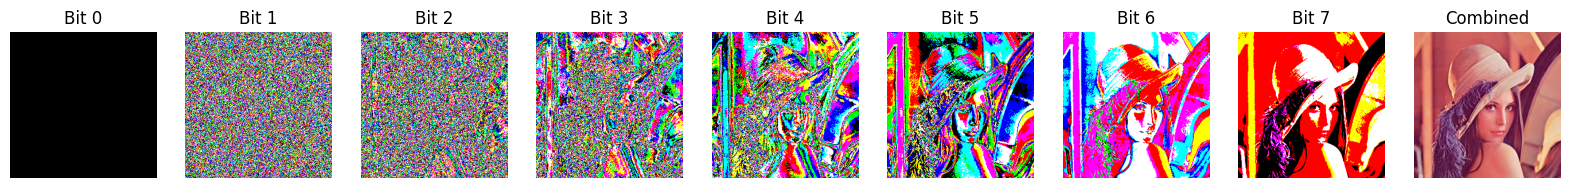

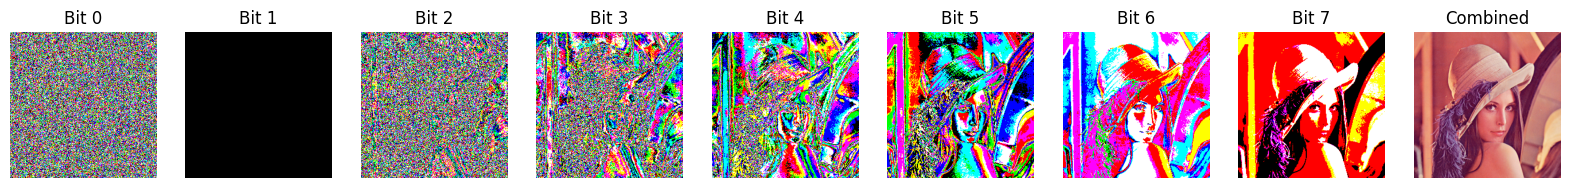

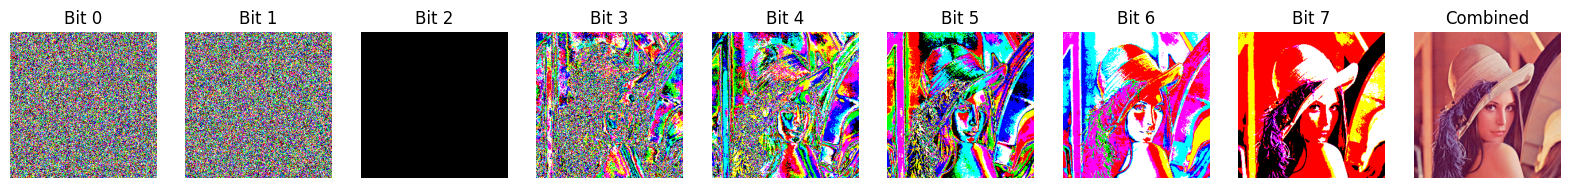

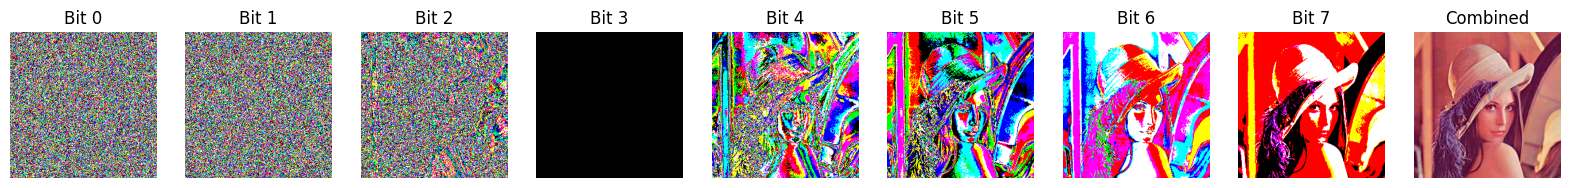

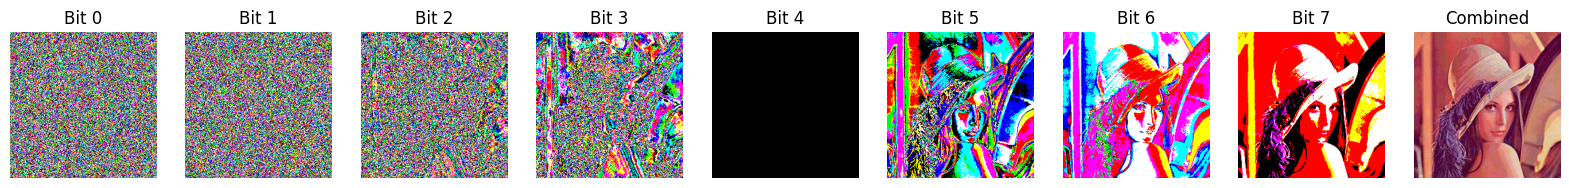

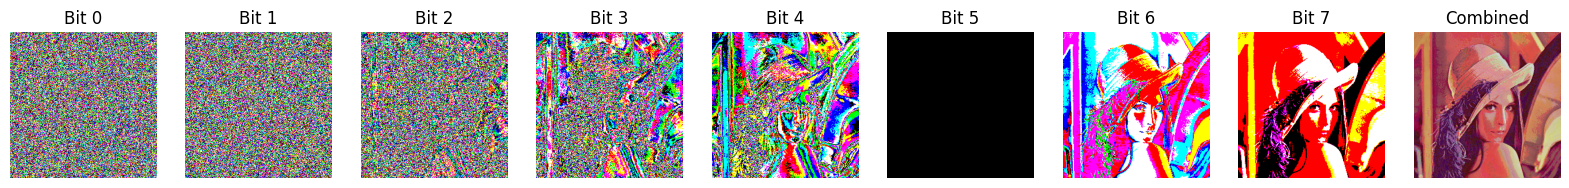

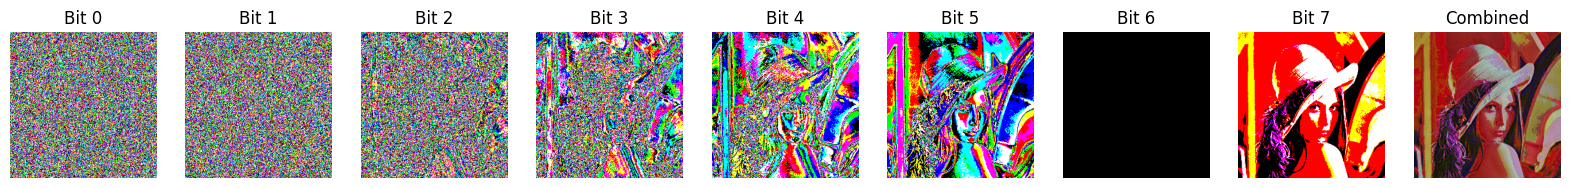

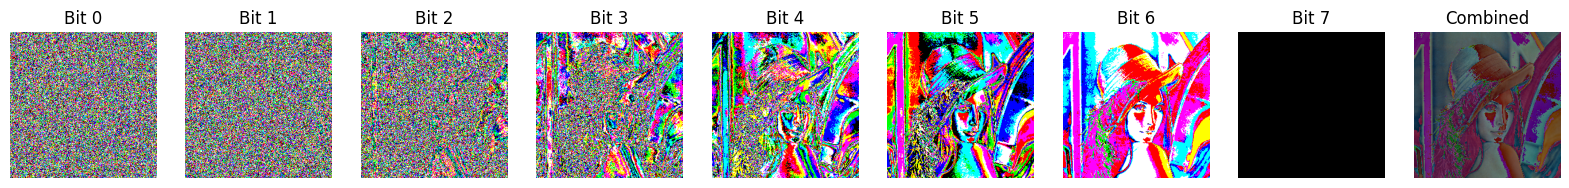

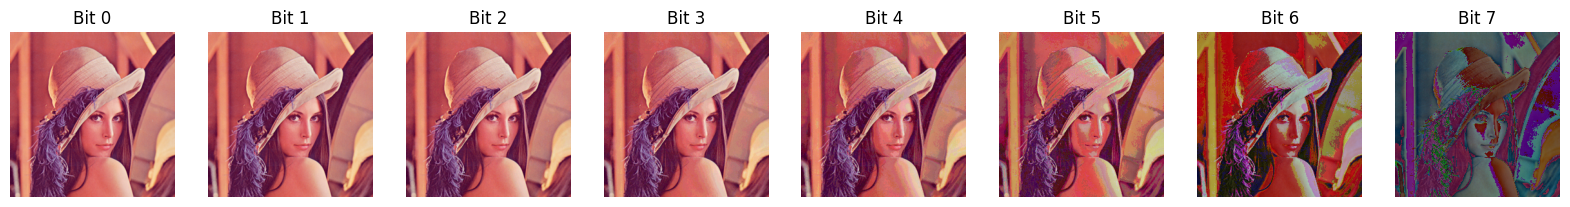

In [119]:

# show_image_all_bits(clear_bits(image, 2))
image = load_image("lenna.bmp")
image_bit_list = []
for i in range(8):
    new_image = clear_bits(image, i)
    show_image_all_bits(new_image)
    image_bit_list.append(new_image)

show_bit_images(image_bit_list)

In [53]:
import random

def generate_unique_random_sequence(range_start, range_end, seed, count):
    random.seed(seed)
    return random.sample(range(range_start, range_end), count)

3920 65536

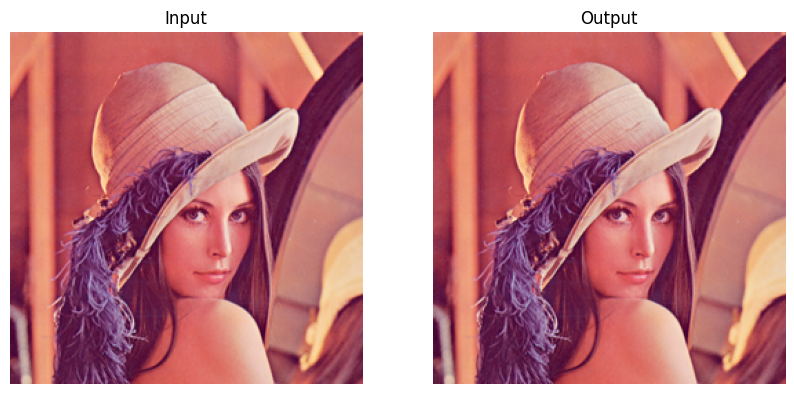

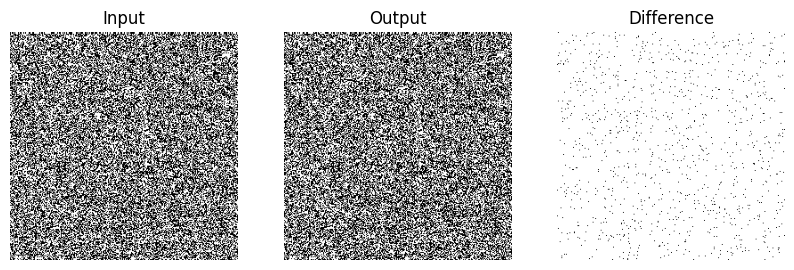

Extracted secret data: bytearray(b'Hi! This is secret message from zenor0-102103149.\nflag{fzu_102103149}\nHi! This
is secret message fro')

Extracted secret data length: 100

Original secret data: b'Hi! This is secret message from zenor0-102103149.\nflag{fzu_102103149}\nHi! This is secret 
message from zenor0-102103149.\nflag{fzu_102103149}\nHi! This is secret message from 
zenor0-102103149.\nflag{fzu_102103149}\nHi! This is secret message from zenor0-102103149.\nflag{fzu_102103149}\nHi!
This is secret message from zenor0-102103149.\nflag{fzu_102103149}\nHi! This is secret message from 
zenor0-102103149.\nflag{fzu_102103149}\nHi! This is secret message from zenor0-102103149.\nflag{fzu_102103149}\n'

Original secret data length: 490

In [121]:
BYTE_SIZE = 8

def embed_secret_into_image(image: Image.Image, secret_data: bytes, seed = 0xdeadbeef):
    """将秘密数据嵌入到图像中"""
    # 生成随机序列
    width, height = image.size
    sequence = generate_unique_random_sequence(0, width * height, seed, len(secret_data) * BYTE_SIZE)
    
    # 获取图像的像素数据
    pixels = image.load()
    
    # secret_data to bit sequence
    secret_bits = []
    for byte in secret_data:
        for i in range(BYTE_SIZE):
            secret_bits.append((byte >> i) & 1)
    
    print(len(secret_bits), width * height)
    if len(secret_bits) > width * height:
        raise ValueError("Image is too small to embed all the secret data")
            
    # 嵌入秘密数据
    for i, bit in enumerate(secret_bits):
        x, y = sequence[i] % width, sequence[i] // width
        r, g, b = pixels[x, y]
        if bit == 1:
            r |= 1
        else:
            r &= 0xFE
        pixels[x, y] = (r, g, b)
        
    return image


def extract_secret_from_image(image: Image.Image, max_length = 100, seed = 0xdeadbeef):
    """从图像中提取秘密数据"""
    # 生成随机序列
    width, height = image.size
    sequence = generate_unique_random_sequence(0, width * height, seed, max_length * BYTE_SIZE)
    
    # 获取图像的像素数据
    pixels = image.load()
    
    # 从图像中提取秘密数据
    secret_data = bytearray()
    for i in range(0, max_length * BYTE_SIZE, BYTE_SIZE):
        byte = 0
        for j in range(BYTE_SIZE):
            x, y = sequence[i + j] % width, sequence[i + j] // width
            r, _, _ = pixels[x, y]
            byte |= ((r & 1) << j)
        secret_data.append(byte)
        
    return secret_data
# 读取秘密数据
with open("secretfile.txt", "rb") as f:
    secret_data = f.read()
    
# 将秘密数据嵌入到图像中
image = load_image("lenna.bmp")
image_with_secret = embed_secret_into_image(image, secret_data, 0xDEADBEEF)


original_image = load_image("lenna.bmp")
show_images([original_image, image_with_secret], ['Input', 'Output'])


# compare before and after

original_image_0_channel = get_bit_image(original_image, 0).split()[0]
image_0_channel = get_bit_image(image_with_secret, 0).split()[0]
#calculate the difference
import numpy as np
original_image_0_channel = np.array(original_image_0_channel)
image_0_channel = np.array(image_0_channel)
diff = np.abs(original_image_0_channel - image_0_channel)
diff = -diff + 255

show_images([original_image_0_channel, image_0_channel, diff], ['Input', 'Output', 'Difference'])


# 从图像中提取秘密数据

from rich import print
extracted_secret_data = extract_secret_from_image(image_with_secret, max_length=100)
print(f'[bold magenta]Extracted secret data:[/bold magenta] {extracted_secret_data}')
print(f'[bold magenta]Extracted secret data length:[/bold magenta] {len(extracted_secret_data)}')
print(f'[bold magenta]Original secret data:[/bold magenta] {secret_data}')
print(f'[bold magenta]Original secret data length:[/bold magenta] {len(secret_data)}')
